## Analyze A/B Test Results
## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction
This dataset represents data collected from an A/B test conducted by an e-commerce company. The company was testing a new webpage design to see if it would increase the number of user conversions (users paying for the product). 

Each row in the dataset corresponds to a unique user and includes:
- `country`: the user’s country of origin.
- `group`: whether the user was in the control group (old page) or treatment group (new page).
- `converted`: whether the user converted (1) or not (0).

The goal of this analysis is to use statistical testing and data analysis to determine whether the new webpage performs significantly better than the old one in terms of conversion rate.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape # we have 69889 rows and 3 columns

(69889, 3)

`c)` The proportion of users converted.

In [5]:
df['converted'].mean() # the proportion of users that converted is 13%

np.float64(0.13047832992316388)

`d)` Do any of the rows have missing values? 

In [6]:
df.isna().sum() # there are no missing values in the dataset

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [7]:
df['country'].value_counts() # the dataset contains users from 3 countries: UK :48,850, US:17,551 and CA:3,488

country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64

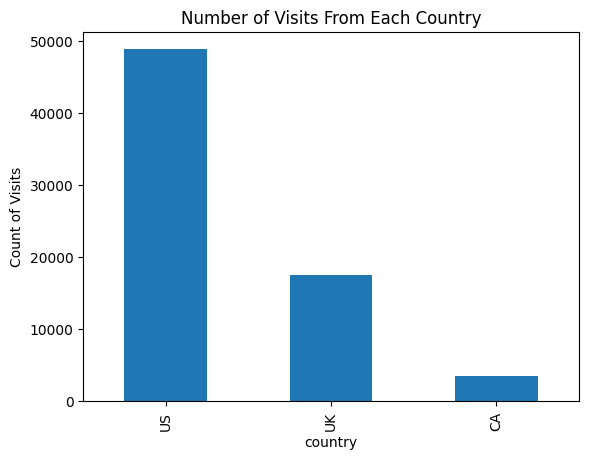

In [8]:
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

##### A better visualization can be used in the presentation:

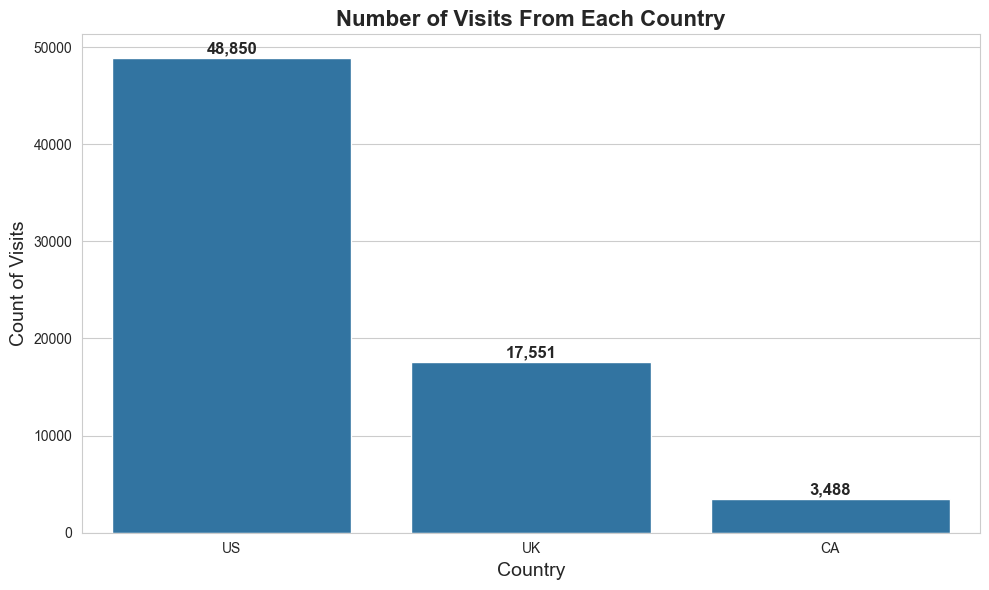

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['country'].value_counts().index, y=df['country'].value_counts().values, color="tab:blue") 

plt.title('Number of Visits From Each Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Visits', fontsize=14)

for i, value in enumerate(df['country'].value_counts().values):
    ax.text(i, value + 500, f'{value:,}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**?

In [10]:
df.info() #The 'converted' column is not categorical; it's numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

In [11]:
# Check unique values in converted column
print("Unique values in converted column:")
print(df['converted'].value_counts())

Unique values in converted column:
converted
0    60770
1     9119
Name: count, dtype: int64


 > Yes, it makes complete sense that the 'converted' column only has values of 0 and 1 because its a binary classification, 0 means the user didn't convert (no purchase/signup), and 1 means they did. in A/B testing, we track success/failure as binary because we're only interested in if the user took action or not. There’s no middle ground since a user can't "partially convert" they either do the action 1 or not 0. 


<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [12]:
df['converted'].mean() #the probability of conversion is 0.1305

np.float64(0.13047832992316388)

`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [13]:
df.query('group == "control"')['converted'].mean()

np.float64(0.1052540515600669)

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [14]:
df.query('group == "treatment"')['converted'].mean()

np.float64(0.15532078043793132)

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

>Yes - there is evidence that the treatment is related to higher conversion rates

In [15]:
control_rate = df.query('group == "control"')['converted'].mean()
treatment_rate = df.query('group == "treatment"')['converted'].mean()

print(f"Control group conversion rate: {control_rate:.4f}")
print(f"Treatment group conversion rate: {treatment_rate:.4f}")
print(f"Difference in conversion rates: {treatment_rate - control_rate:.4f}")

Control group conversion rate: 0.1053
Treatment group conversion rate: 0.1553
Difference in conversion rates: 0.0501


`e)` What is the probability that an individual was in the `treatment`?

In [16]:
(df['group'] == 'treatment').mean()

np.float64(0.5038131894861853)

`f)` What is the probability that an individual was from Canada `CA`?

In [17]:
df.query('country == "CA"')['converted'].mean()

np.float64(0.1252866972477064)

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [18]:
df.query('country == "US"')['converted'].mean()

np.float64(0.13277379733879222)

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [19]:
df.query('country == "UK"')['converted'].mean()

np.float64(0.12512107572218106)

In [20]:
# Calculate probability of conversion for CA control group
df.query('country == "CA" and group == "control"')['converted'].mean()

np.float64(0.0944741532976827)

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [21]:
country_conversion_rates = df.groupby('country')['converted'].mean()
print(country_conversion_rates)

country
CA    0.125287
UK    0.125121
US    0.132774
Name: converted, dtype: float64


`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [22]:
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

In [23]:
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

In [24]:
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

##### Solution
|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10%          |  9%          |
| Treatment   | 15.8%       |  14%          |  15%          |

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [25]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

p_control_treatment_null

np.float64(0.13047832992316388)

In [26]:
n_treatment

35211

In [27]:
n_control

34678

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [28]:
treatment_converted = np.random.choice([0, 1], size=n_treatment, p=[1 - p_control_treatment_null, p_control_treatment_null])

treatment_converted[0:20]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [29]:
control_converted = np.random.choice([0,1], size=n_control, p=[1-p_control_treatment_null, p_control_treatment_null])

treatment_converted[0:20]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [30]:
# Calculate the difference in conversion rates under the null hypothesis
p_treatment = treatment_converted.mean()
p_control = control_converted.mean()

# Difference between treatment and control conversion rates
p_diff = p_treatment - p_control
p_diff

np.float64(-0.002762532351148733)

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [31]:
p_diffs = []
for _ in range(500):
    control_converted = np.random.choice([0,1], size=n_control, p=[1-p_control_treatment_null, p_control_treatment_null])
    treatment_converted = np.random.choice([0, 1], size=n_treatment, p=[1 - p_control_treatment_null, p_control_treatment_null])
    p_treatment = treatment_converted.mean()
    p_control = control_converted.mean()
    p_diff = p_treatment - p_control

    p_diffs.append(p_diff)

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

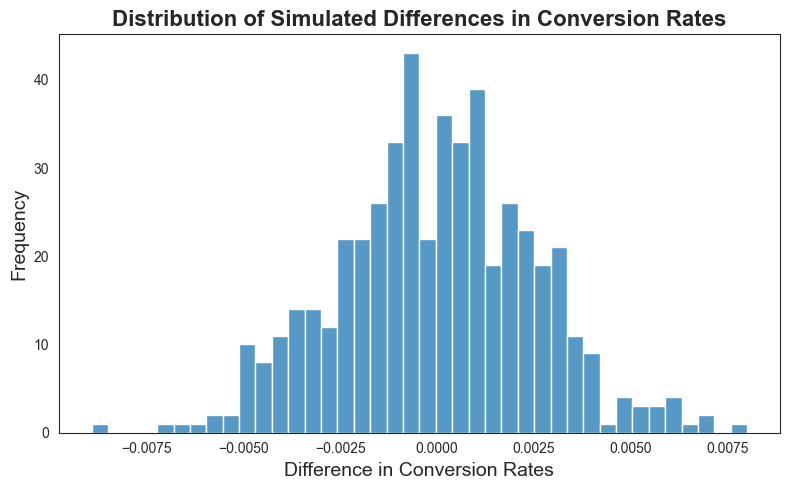

In [32]:
sns.set_style("white")
plt.figure(figsize=(8, 5))
sns.histplot(p_diffs, bins=40, kde=False, color="tab:blue")

plt.title('Distribution of Simulated Differences in Conversion Rates', fontsize=16, fontweight='bold')
plt.xlabel('Difference in Conversion Rates', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [33]:
obs_diff = df.query('group == "treatment"')['converted'].mean() - df.query('group == "control"')['converted'].mean()
obs_diff

np.float64(0.050066728877864425)

In [34]:
p_value = (np.array(p_diffs) > obs_diff).mean()
p_value

np.float64(0.0)

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

> We found the p-value, which helps us see if the difference between the new page and the old one is just random or not. Basically, it checks how many times the random results were bigger than what we actually saw.
> 
> If the p-value is low (under 0.05), that means it's probably not random and we don’t trust the null thing anymore.
> But if it's high (like over 0.05), it means the difference might just be luck or random, so we keep the null.
> 
> So... if the p-value is more than 0.05, we can't say the new page is better than the old one.

> We got the p-value and it was 0.0
> That means the chance of seeing a difference like ours just by random luck is basically REALLY low.
> 
> So since it’s way less than 0.05, we say that this is not random and we reject the null hypothesis.
> 
> Conclusion:
> The new page(treatment) is doing **way better than the old one**! There's no chance this happened by accident 









<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Logistic regression

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [38]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,False
1,US,treatment,1,1,True
2,UK,treatment,0,1,True
3,UK,control,0,1,False
4,UK,treatment,0,1,True


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [46]:
X = df[['intercept', 'ab_page']]
y = df['converted']

# Ensure ab_page is numeric
X['ab_page'] = X['ab_page'].astype(int)


C:\Users\Yasser\AppData\Local\Temp\ipykernel_7756\2660739051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ab_page'] = X['ab_page'].astype(int)


`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [49]:
# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [50]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                0.007175
Time:                        21:18:07   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

>0.000 This means that the result is statistically significant, as the p-value is less than the commonly used threshold of 0.05 which is alpha.
>
>This leads to the conclusion that there is a significant difference between the treatment and control groups, which lead to the same conclusions i drew in the Experiment section 

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [53]:
df[['US', 'UK']] = pd.get_dummies(df['country'])[['US', 'UK']].astype(int)
df.head()


,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,False,0,1
1,US,treatment,1,1,True,1,0
2,UK,treatment,0,1,True,0,1
3,UK,control,0,1,False,0,1
4,UK,treatment,0,1,True,0,1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [66]:
X = df[['intercept', 'ab_page', 'US', 'UK']]
y = df['converted']

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [67]:
# Ensure ab_page is numeric
X['ab_page'] = X['ab_page'].astype(int)

# Fit the Logit model
lm2 = sm.Logit(y, X)
lm2_res = lm2.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


C:\Users\Yasser\AppData\Local\Temp\ipykernel_7756\2468456389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ab_page'] = X['ab_page'].astype(int)


`d)` Provide the summary of your model below.

In [69]:
print(lm2_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                0.007312
Time:                        21:29:59   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
US             0.0727      0.053      1.372      0.1

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

The p-value for US is 0.170, which is not statistically significant (greater than 0.05).
The p-value for UK is 0.905, which is also not statistically significant (greater than 0.05).

This suggests that neither being from the US nor the UK has a statistically significant impact on the likelihood of conversion



Interpreting model fit and figuring out why some models better than others

> We picked the logistic regression model because our main variable, `converted`, only has two options: either someone converted (1) or they didn’t (0). Logistic regression is great for this kind of thing because it helps us figure out the chance of something happening or not.

> In the first model, we only used the `ab_page` variable to compare the treatment group with the control group. The results showed a pretty important p-value, which means that the page someone saw actually had a real effect on whether they converted or not.

> Then in the second model, we added country variables like `US` and `UK` to see if where people are from made any difference. But those p-values weren’t that important, so it looks like the country didn’t really affect conversions much once we already knew what page they saw.

> We didn’t use linear regression because it doesn’t work well with yes-or-no (binary) outcomes. It could give weird results like predicting chances over 100%, which makes no sense. Logistic regression fixes that by keeping all the results between 0 and 1.

> So overall, the logistic regression models worked well for this project. They helped us see how the page type affects conversions the most. Adding the country was cool to check for extra info, but it didn’t really change anything big.


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.
